In [1]:
# Terminologies
# Bias : The error of the trainging data
# Variance : The error of the testing data
# Underfitting : High Bias and High Variance
# Overfitting : Low Bias and High Variance

# The model we should choose : Low Bias and Low Variance

In [2]:
# RANDOM FOREST (Bagging model due to bootstrap data)
# Ensemble Technique : Has a collection of different tree models

In [3]:
# CASE
# An insurance company is thinking to start a laptop insurance which benifits them in long run. Which model can be used to check it ?
# Decision Tree or Linear Regression
# Decision Tree
# WHY ? : Can analyse various possibilities and considers conditions of different people

# Is there a possibility where we can get higher accuracy using linear regression compared to Decision Tree?
# Random Forest is a collection of Decision Trees
# Best to use AutoML

In [4]:
# Random Forest
# Data -> Bootstrap Data -> different Decision Trees -> Highest Voted Decision -> Output

# Bootstrap Data : A new dataset where it Randomly picks sample data from the actual dataset and it can be duplicated and its not necessary that all the data points are included.
# Decision Tree never takes all the features as head. 
# These decisions Trees are different from each other.

# This Bootstrap data is used for decision trees in random forest

In [5]:
# Parameters
# n_estimators : playing with this parameter is called HYPERPARAMETRIC TRAINING

# Cannot just tell that it has low accuracy. Changing different parameters can give best results


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split

In [7]:
# Example

# Importing the Dataset
link = "https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv"
df = pd.read_csv(link)

In [8]:
# Data Analysis (EDA, DM, DE, DC, DV)
# The data is clean

In [9]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [11]:
# Assigning features and target
X = np.array(df.Temperature)
y = np.array(df.Revenue)

In [12]:
# Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

In [13]:
# Model Selection
from sklearn.ensemble import RandomForestRegressor

In [14]:
regressor =RandomForestRegressor(n_estimators = 10, random_state = 0)

In [15]:
# Training the model
regressor.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

# reshape(-1, 1) if your data has a single feature or array. reshape(1, -1) if it contains a single sample. We could change our Series into a NumPy array and then reshape it to have two dimensions.

C:\Users\LOHITHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=10, random_state=0)

In [16]:
# Testing the model
y_pred = regressor.predict(X_test.reshape(-1, 1))

In [17]:
# Comparison Dataset
pred = pd.DataFrame({'Actual' : y_test.reshape(-1),
                     'Predict' : y_pred.reshape(-1)})

In [18]:
pred.head()

,Actual,Predict
0,706.724604,767.130992
1,678.751388,675.947467
2,382.073954,375.915892
3,607.542148,570.599955
4,660.632289,645.514675


Text(0, 0.5, 'Revenue')

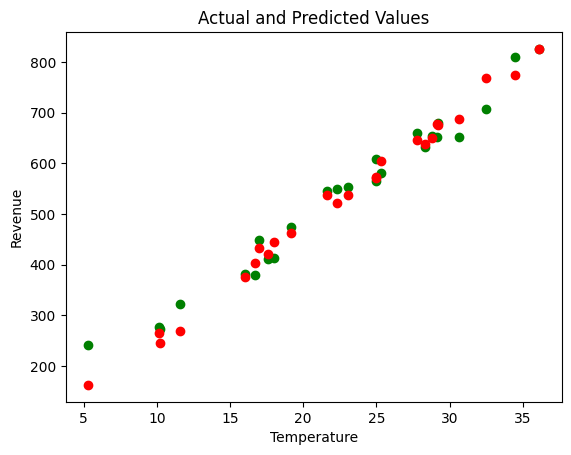

In [19]:
plt.scatter(X_test, y_test, color = 'green')
plt.scatter(X_test, y_pred, color = 'red')
plt.title('Actual and Predicted Values')
plt.xlabel('Temperature')
plt.ylabel('Revenue')

<Axes: >

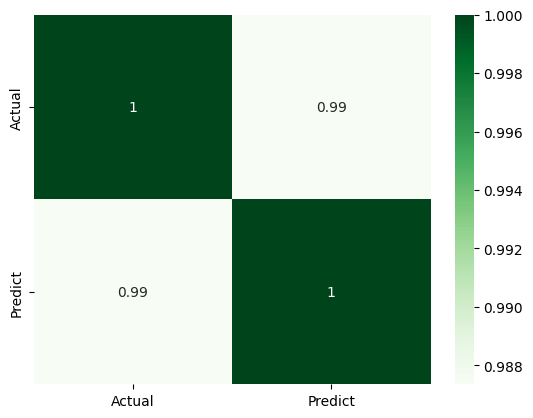

In [20]:
# Positive correlation (Strong +ve correlation)

# Heatmap
sns.heatmap(pred.corr(), annot = True, cmap = 'Greens')

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [22]:
r2_score(y_test, y_pred)

0.9653743323148893

In [23]:
# SAME PROJECT AS DECISION TREE
# Importing the dataset
link = "https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/cardekho_data.csv"
df = pd.read_csv(link)

In [24]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [25]:
# Data Analysis (EDA, DE, DM, DC, DV)
df.shape

(301, 9)

In [26]:
print('Fuel', df.Fuel_Type.unique())
print('Seller Type', df.Seller_Type.unique())
print('Transmission', df.Transmission.unique())
print('Owner Type', df.Owner.unique())

Fuel ['Petrol' 'Diesel' 'CNG']
Seller Type ['Dealer' 'Individual']
Transmission ['Manual' 'Automatic']
Owner Type [0 1 3]


In [27]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [28]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [29]:
from datetime import datetime
df['current_year'] = datetime.now().year

In [30]:
df['no of years'] = df['current_year'] - df['Year']

In [31]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no of years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024,10


In [32]:
# Remove Year Column and Car_Name column
df.drop(['Car_Name', 'Year'], axis = 1, inplace = True)

In [33]:
df.drop(['current_year'], axis = 1, inplace = True)

In [34]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no of years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [35]:
df = pd.get_dummies(df)

In [36]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no of years,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,10,False,False,True,True,False,False,True
1,4.75,9.54,43000,0,11,False,True,False,True,False,False,True
2,7.25,9.85,6900,0,7,False,False,True,True,False,False,True
3,2.85,4.15,5200,0,13,False,False,True,True,False,False,True
4,4.60,6.87,42450,0,10,False,True,False,True,False,False,True


In [37]:
df.shape

(301, 12)

In [38]:
# There are no CNG, Automatic and Individual values (which makes dealer to be always 1)
# Hence drop those values
df.drop(['Fuel_Type_CNG', 'Seller_Type_Dealer', 'Transmission_Automatic'], inplace = True, axis = 1)

In [39]:
df.shape

(301, 9)

In [40]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no of years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no of years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


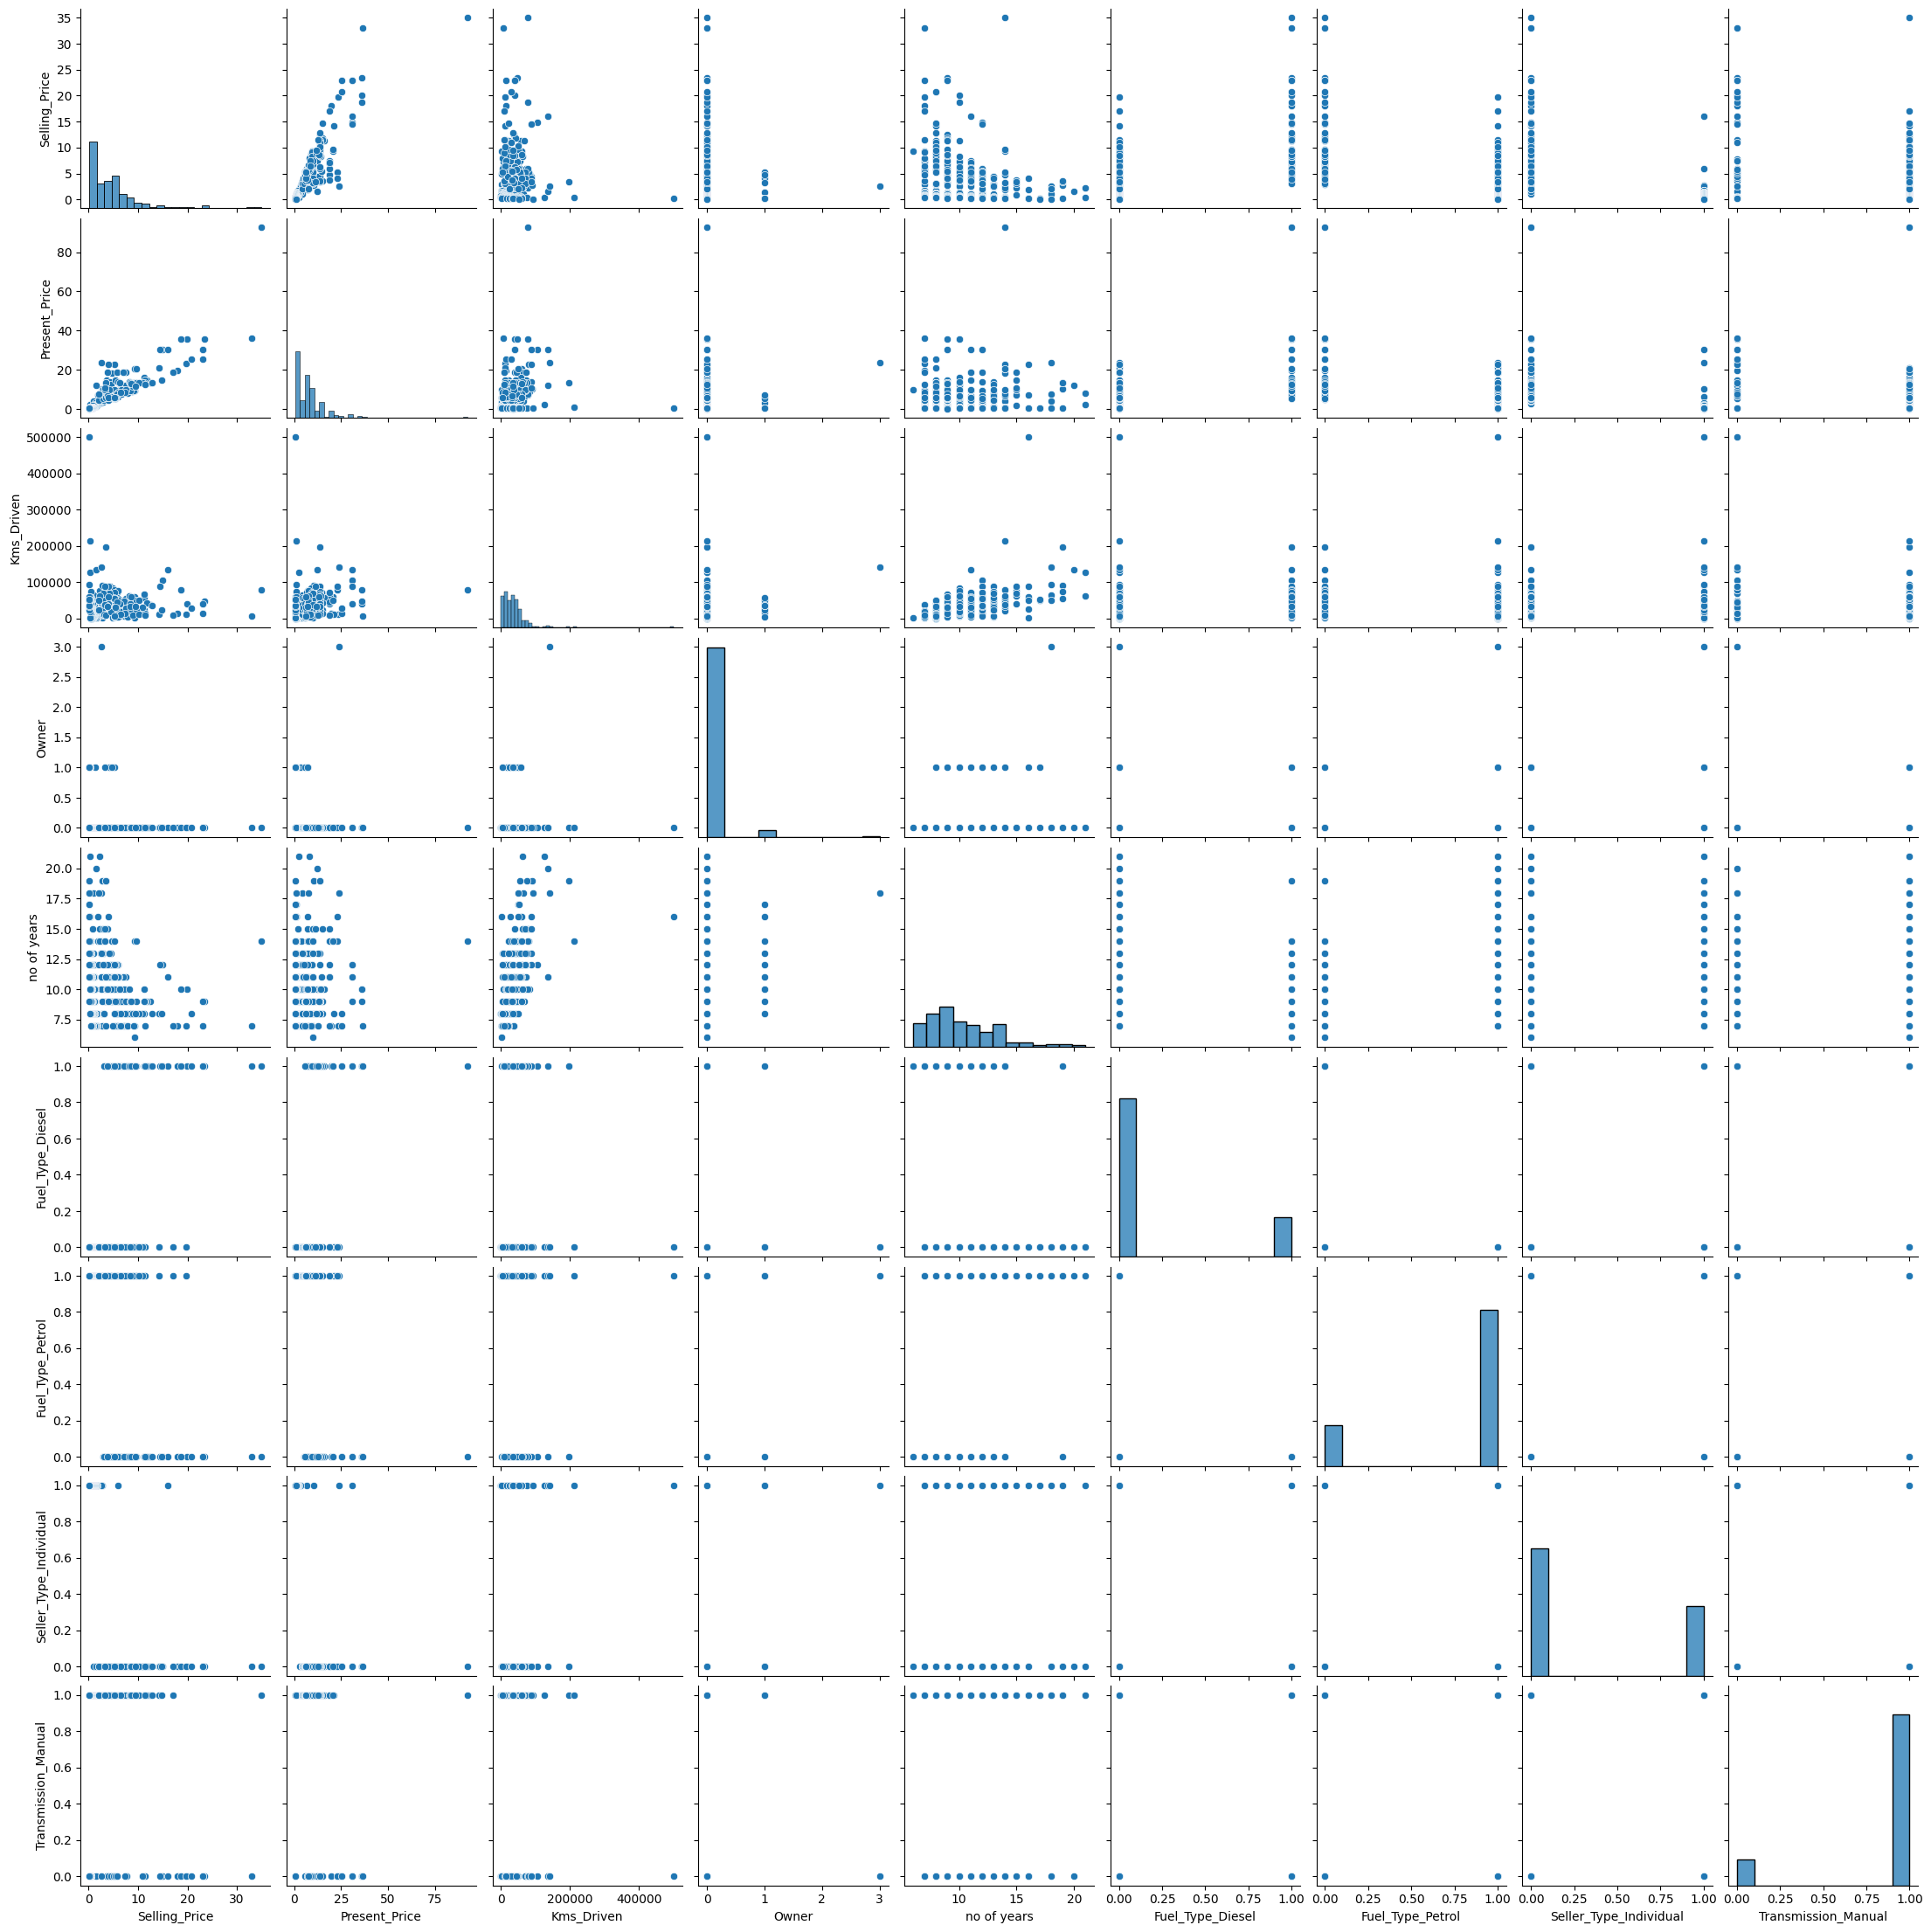

In [41]:
sns.pairplot(df)

<Axes: >

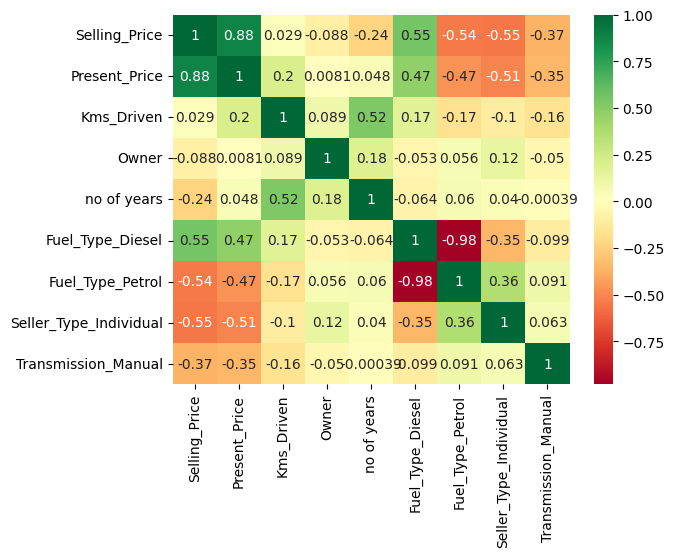

In [42]:
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn')

In [43]:
# X = np.array(df.iloc[:,1:])
# y = np.array(df.iloc[:,0])
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [44]:
# Feature Selection (Feature Importance)
from sklearn.ensemble import ExtraTreesRegressor

In [45]:
model = ExtraTreesRegressor()
feat_imp = model.fit(X, y)

In [46]:
feat_imp.feature_importances_

array([3.75646727e-01, 3.74090768e-02, 3.54358932e-04, 7.68051391e-02,
       2.37322127e-01, 7.54353306e-03, 1.28489667e-01, 1.36429371e-01])

<Axes: >

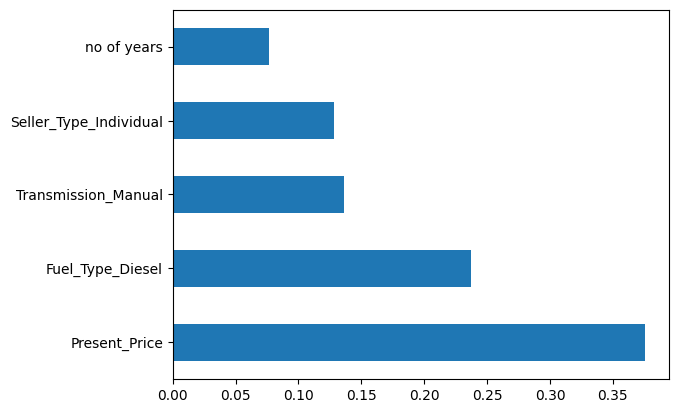

In [47]:
imp = pd.Series(feat_imp.feature_importances_, index = X.columns)
imp.nlargest(5).plot(kind = 'barh')

In [48]:
# Present_Price has larger impact

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [55]:
# Model Selection
regressor = RandomForestRegressor()

In [51]:
# Hyper Parameter Tuning
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [52]:
random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [53]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
rf_regressor = RandomizedSearchCV(estimator = regressor,
                                  param_distributions = random_grid,
                                  scoring = 'neg_mean_squared_error',
                                  cv = 5,
                                  verbose = 2,
                                  random_state = 42,
                                  n_jobs = 1)

In [59]:
rf_regressor.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\LOHITHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LOHITHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LOHITHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\LOHITHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [60]:
rf_regressor.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [62]:
y_pred = rf_regressor.predict(X_test)

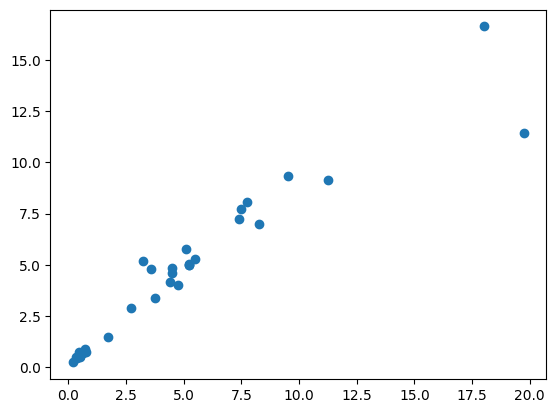

In [63]:
plt.scatter(y_test, y_pred)

In [64]:
finaldf = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})

In [66]:
finaldf

,Actual,Predicted
223,8.25,6.99258
150,0.50,0.55742
226,5.25,4.97155
296,9.50,9.31735
52,18.00,16.63574
261,5.50,5.27189
246,3.75,3.37671
166,0.45,0.76543
221,4.50,4.86138
215,4.50,4.57855


<Axes: >

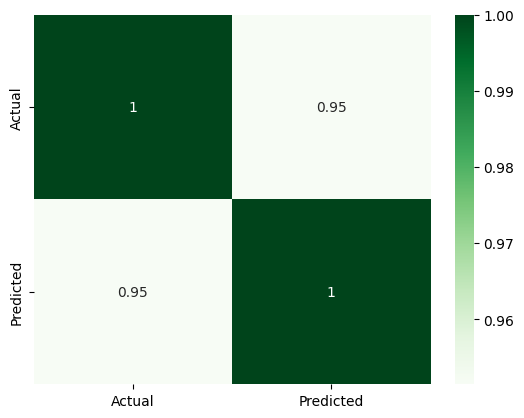

In [67]:
sns.heatmap(finaldf.corr(), annot = True, cmap = 'Greens')

In [68]:
r2_score(y_test, y_pred)

0.87574211277501

In [ ]:
# Accuracy increased